<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 153.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 144.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 128.0 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [36]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [37]:
## Write your code here
duplicates = df.drop(columns=['ResponseId']).duplicated()
num_duplicates = duplicates.sum()
print("Number of duplicate rows (excluding 'ResponseId'):", num_duplicates)
df_cleaned=df[~duplicates]

Number of duplicate rows (excluding 'ResponseId'): 487


In [22]:
print('Number of Employment Missing Value:',df_cleaned['Employment'].isnull().sum())
print('Number of JobSat Missing Value:',df_cleaned['JobSat'].isnull().sum())
print('Number of RemoteWork Missing Value:',df_cleaned['RemoteWork'].isnull().sum())
print(df_cleaned['JobSat'].value_counts(dropna=False))
print(df_cleaned['RemoteWork'].value_counts(dropna=False))

Number of Employment Missing Value: 0
Number of JobSat Missing Value: 35824
Number of RemoteWork Missing Value: 10546
JobSat
NaN     35824
8.0      7509
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64
RemoteWork
Hybrid (some remote, some in-person)    22850
Remote                                  20732
In-person                               10822
NaN                                     10546
Name: count, dtype: int64


In [38]:
df_cleaned.loc[:,'RemoteWork']=df_cleaned['RemoteWork'].fillna('Unknown')

In [39]:
print(df_cleaned['RemoteWork'].value_counts(dropna=False))

RemoteWork
Hybrid (some remote, some in-person)    22850
Remote                                  20732
In-person                               10822
Unknown                                 10546
Name: count, dtype: int64


In [40]:
median_value = df_cleaned['JobSat'].median()
print(median_value)

7.0


In [41]:
df_cleaned['JobSat'].describe()

count    29126.000000
mean         6.935041
std          2.088259
min          0.000000
25%          6.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: JobSat, dtype: float64

In [43]:
df_cleaned.loc[:, 'JobSat']=df_cleaned.fillna({'JobSat':mean_value})
print(df_cleaned['JobSat'].value_counts(dropna=False))

JobSat
7.0     42203
8.0      7509
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [44]:
## Write your code here
df_cleaned.loc[:,'YearsCodePro'] = df_cleaned['YearsCodePro'].str.strip()
df_cleaned.loc[:,'YearsCodePro'] = df_cleaned['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}).astype(float)
print(df_cleaned['YearsCodePro'].value_counts(dropna=False))

YearsCodePro
NaN     13340
2.0      4168
3.0      4093
5.0      3526
10.0     3251
4.0      3215
0.5      2856
6.0      2843
1.0      2639
8.0      2549
7.0      2517
12.0     1777
15.0     1635
20.0     1549
9.0      1493
11.0     1312
13.0     1127
14.0     1082
25.0      998
16.0      946
18.0      867
17.0      814
30.0      689
24.0      632
19.0      516
22.0      492
23.0      448
26.0      426
27.0      380
21.0      380
28.0      342
35.0      285
29.0      196
40.0      194
32.0      194
34.0      169
38.0      134
33.0      132
36.0      119
31.0      106
37.0      104
45.0       56
42.0       55
39.0       54
41.0       51
51.0       50
44.0       42
43.0       37
46.0       21
50.0       14
48.0       14
49.0       11
47.0       10
Name: count, dtype: int64


In [46]:
# Define bins and labels
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5 years', '5-10 years', '10-20 years', '20+ years']

# Create new column with experience range
df_cleaned.loc[:,'ExperienceRange'] = pd.cut(df_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)

In [53]:
print(df_cleaned['ExperienceRange'].value_counts(dropna=False))

ExperienceRange
NaN            28124
0-5 years      13234
5-10 years      9464
10-20 years     8978
20+ years       5150
Name: count, dtype: int64


In [55]:
median_satisfaction = df_cleaned.groupby('ExperienceRange')['JobSat'].median()
print(median_satisfaction)

ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
20+ years      7.0
Name: JobSat, dtype: float64


/tmp/ipykernel_375/219365025.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_cleaned.groupby('ExperienceRange')['JobSat'].median()


/tmp/ipykernel_375/4278105878.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette="viridis")


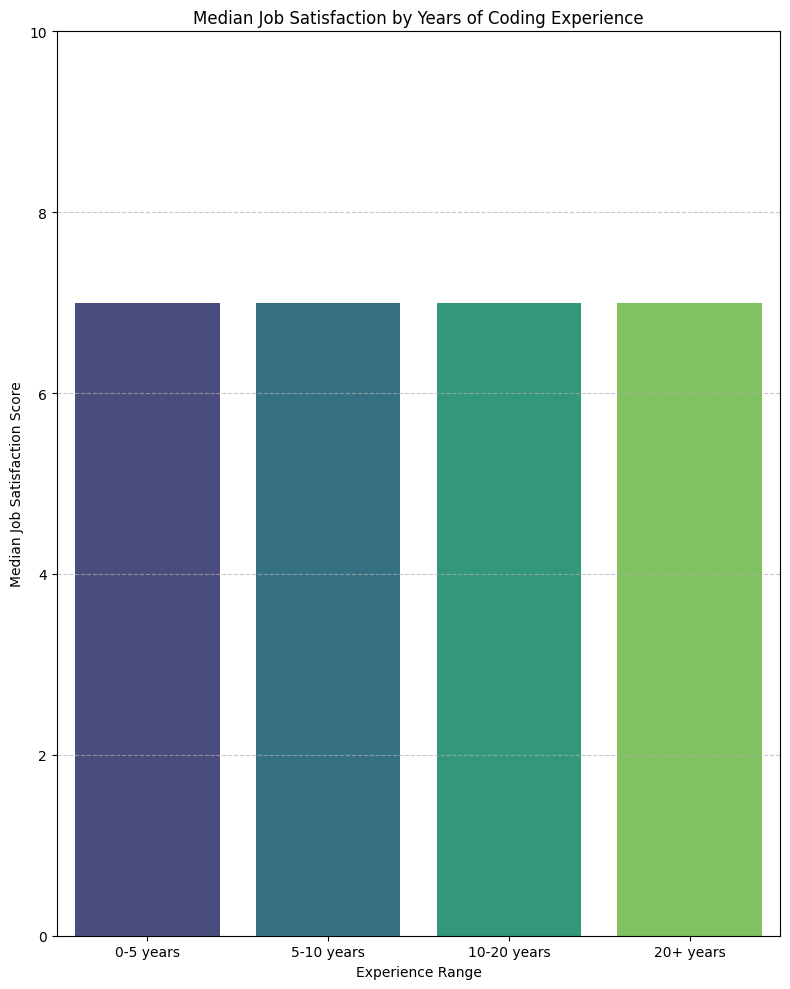

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values, palette="viridis")

plt.title('Median Job Satisfaction by Years of Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.xlabel('Experience Range')
plt.ylim(0, 10)  # Because scores are from 1 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_375/1914053530.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='JobSat', order=df_cleaned['JobSat'].value_counts().index, palette='coolwarm')


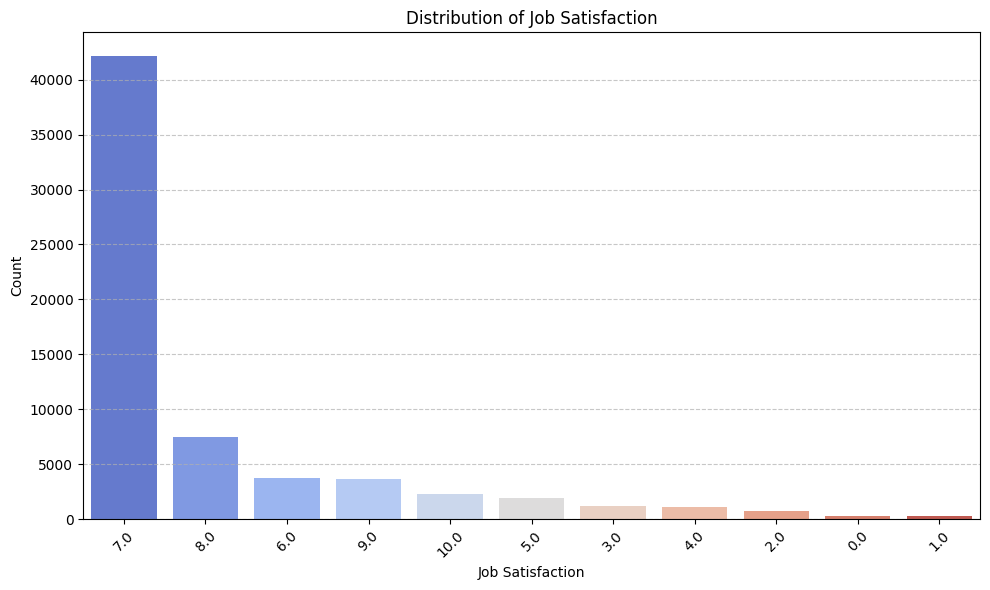

In [60]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='JobSat', order=df_cleaned['JobSat'].value_counts().index, palette='coolwarm')

plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_375/2457715358.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='RemoteWork', order=df_cleaned['RemoteWork'].value_counts().index, palette='Set2')


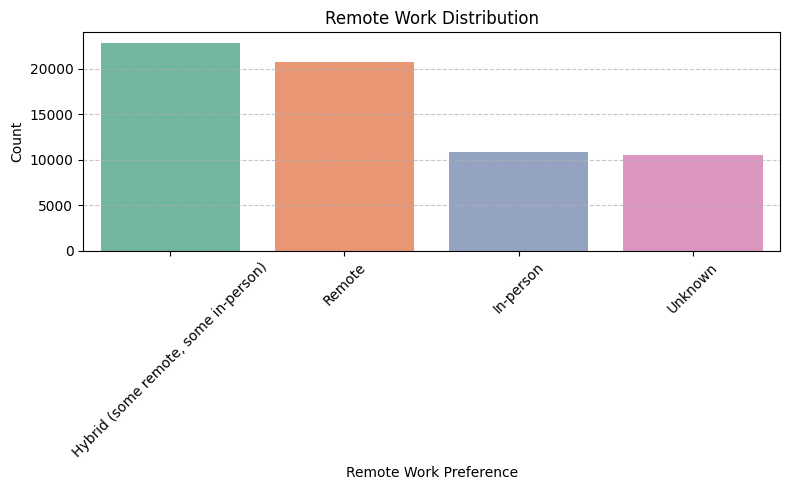

In [62]:
## Write your code here
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='RemoteWork', order=df_cleaned['RemoteWork'].value_counts().index, palette='Set2')

plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [74]:
def simplify_employment(emp):
    if pd.isnull(emp):
        return "Unknown"
    elif "full-time" in emp:
        return "Full-time"
    elif "part-time" in emp:
        return "Part-time"
    elif "Student" in emp:
        return "Student"
    elif "freelancer" in emp or "self-employed" in emp:
        return "Freelancer"
    elif "Retired" in emp:
        return "Retired"
    elif "Not employed" in emp:
        return "Unemployed"
    else:
        return "Other"

# Apply the function
df_cleaned.loc[:,'EmploymentSimple'] = df_cleaned['Employment'].apply(simplify_employment)

In [75]:
print(df_cleaned['EmploymentSimple'].value_counts(dropna=False))

EmploymentSimple
Full-time     52280
Freelancer     5341
Part-time      3244
Unemployed     3000
Retired         547
Other           538
Name: count, dtype: int64


In [76]:
remote_by_simple_employment = pd.crosstab(df_cleaned['EmploymentSimple'], df_cleaned['RemoteWork'], normalize='index') * 100
print(remote_by_simple_employment.round(1))

RemoteWork        Hybrid (some remote, some in-person)  In-person  Remote  \
EmploymentSimple                                                            
Freelancer                                        26.3        6.5    66.9   
Full-time                                         38.8       18.9    31.3   
Other                                              0.0        0.0     0.0   
Part-time                                         35.9       18.2    24.6   
Retired                                            0.0        0.0     0.0   
Unemployed                                         0.0        0.0     0.0   

RemoteWork        Unknown  
EmploymentSimple           
Freelancer            0.3  
Full-time            11.0  
Other               100.0  
Part-time            21.4  
Retired             100.0  
Unemployed          100.0  


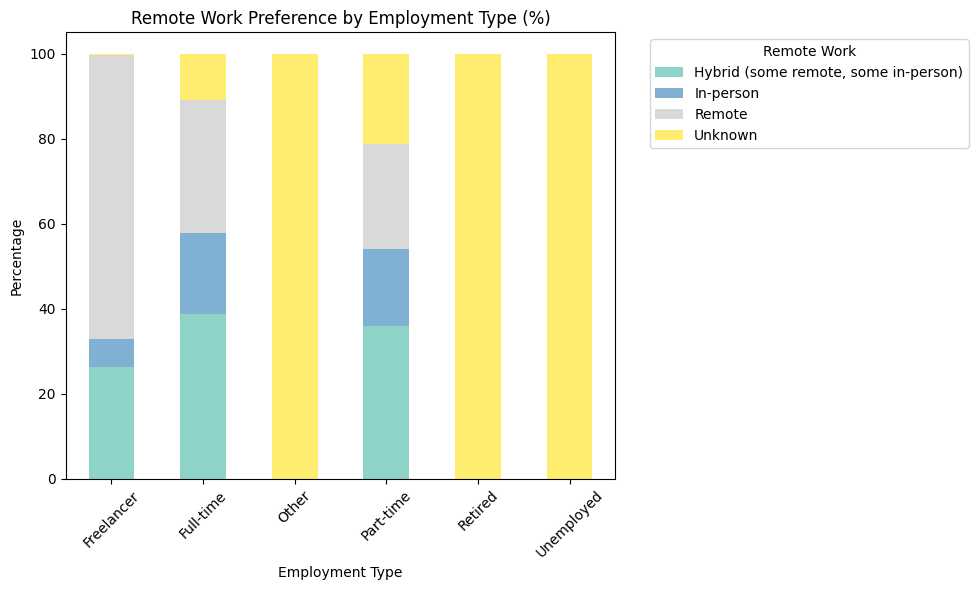

In [78]:
remote_by_simple_employment.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title('Remote Work Preference by Employment Type (%)')
plt.xlabel('Employment Type')
plt.ylabel('Percentage')
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [86]:
country_mapping = {
    "Congo, Republic of the...": "Congo",
    "Democratic Republic of the Congo": "Congo",
    "Lao People's Democratic Republic": "Lao",
    "Libyan Arab Jamahiriya": "Libyan",
    "Democratic People's Republic of Korea": "Korea",
    "Micronesia, Federated States of...": "Micronesia",
    "Democratic People's Republic of Korea": "Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Russian Federation":"Russian",
    "Czech Republic":"Czech",
    "Iran, Islamic Republic of...":"Iran",
    "Hong Kong (S.A.R.)":"Hong Kong",
    "Viet Nam":"VietNam"
}
#df_cleaned.loc[:,'Country'] = df_cleaned['Country'].str.strip().map(country_mapping)
df_cleaned.loc[:,'Country'] = df_cleaned['Country'].str.strip()

#Replace only matching entries, keep others
df_cleaned.loc[:, 'Country'] = df_cleaned['Country'].replace(country_mapping)

print(df_cleaned['Country'].value_counts(dropna=False))

Country
United States      11095
NaN                 6020
Germany             4947
India               4231
United Kingdom      3224
                   ...  
Micronesia             1
Nauru                  1
Chad                   1
Djibouti               1
Solomon Islands        1
Name: count, Length: 185, dtype: int64


In [87]:
## Write your code here
df_lang = df_cleaned[['Country', 'LanguageHaveWorkedWith']].dropna()

# Split multiple languages into individual rows
df_lang = df_lang.assign(Language=df_lang['LanguageHaveWorkedWith'].str.split(';'))
df_lang = df_lang.explode('Language')

# Strip any whitespace from language names
df_lang['Language'] = df_lang['Language'].str.strip()

In [88]:
lang_by_country = df_lang.groupby(['Country', 'Language']).size().reset_index(name='Count')
print(lang_by_country)

          Country                 Language  Count
0     Afghanistan                      Ada      9
1     Afghanistan                     Apex      4
2     Afghanistan                 Assembly      7
3     Afghanistan  Bash/Shell (all shells)     14
4     Afghanistan                        C     13
...           ...                      ...    ...
5503     Zimbabwe                     Rust      4
5504     Zimbabwe                      SQL     15
5505     Zimbabwe               TypeScript     11
5506     Zimbabwe                      VBA      2
5507     Zimbabwe      Visual Basic (.Net)      2

[5508 rows x 3 columns]


In [89]:
# Pivot table
lang_pivot = lang_by_country.pivot(index='Language', columns='Country', values='Count')

# Fill missing values with 0
lang_pivot = lang_pivot.fillna(0)

# (Optional) Select top N languages to keep the heatmap readable
top_langs = lang_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
lang_pivot_top = lang_pivot.loc[top_langs]


In [90]:
print(lang_pivot_top)

Country                  Afghanistan  Albania  Algeria  Andorra  Angola  \
Language                                                                  
JavaScript                      25.0     26.0     53.0      7.0    10.0   
HTML/CSS                        24.0     25.0     52.0      7.0     8.0   
SQL                             21.0     28.0     35.0      8.0     8.0   
Python                          25.0      9.0     37.0      8.0     9.0   
TypeScript                      12.0     14.0     32.0      7.0     6.0   
Bash/Shell (all shells)         14.0     10.0      9.0      4.0     3.0   
Java                            12.0     16.0     13.0      5.0     5.0   
C#                               8.0     12.0     14.0      6.0     4.0   
C++                             13.0      4.0      9.0      4.0     3.0   
C                               13.0      7.0     14.0      3.0     4.0   

Country                  Antigua and Barbuda  Argentina  Armenia  Australia  \
Language            

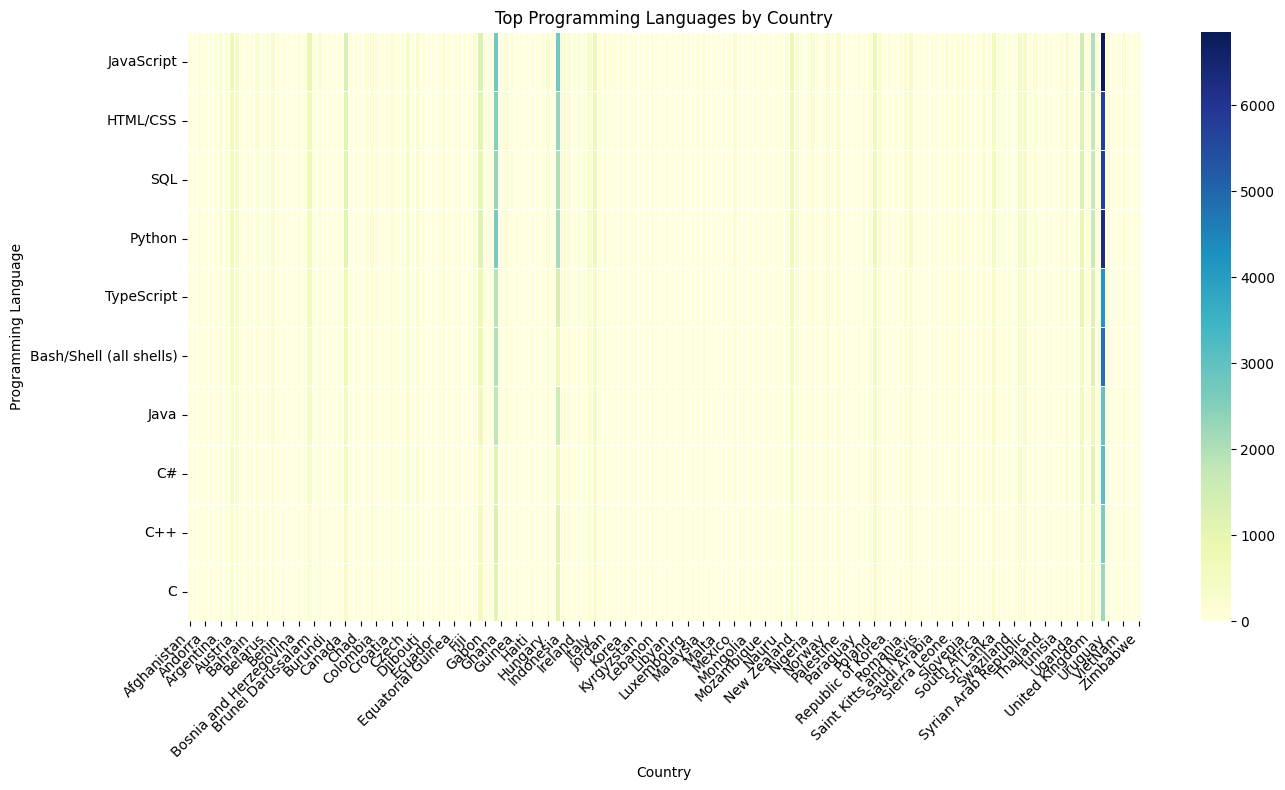

In [92]:
plt.figure(figsize=(14, 8))
sns.heatmap(lang_pivot_top, cmap="YlGnBu", linewidths=0.5, fmt=".0f")

plt.title("Top Programming Languages by Country")
plt.xlabel("Country")
plt.ylabel("Programming Language")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


In [99]:
print(df_cleaned['YearsCodePro'].value_counts(dropna=False))
print(df_cleaned['JobSatPoints_1'].value_counts(dropna=False))
df_exp_sat = df_cleaned[['YearsCodePro', 'JobSatPoints_1']].dropna()

YearsCodePro
NaN     13340
2.0      4168
3.0      4093
5.0      3526
10.0     3251
4.0      3215
0.5      2856
6.0      2843
1.0      2639
8.0      2549
7.0      2517
12.0     1777
15.0     1635
20.0     1549
9.0      1493
11.0     1312
13.0     1127
14.0     1082
25.0      998
16.0      946
18.0      867
17.0      814
30.0      689
24.0      632
19.0      516
22.0      492
23.0      448
26.0      426
27.0      380
21.0      380
28.0      342
35.0      285
29.0      196
40.0      194
32.0      194
34.0      169
38.0      134
33.0      132
36.0      119
31.0      106
37.0      104
45.0       56
42.0       55
39.0       54
41.0       51
51.0       50
44.0       42
43.0       37
46.0       21
50.0       14
48.0       14
49.0       11
47.0       10
Name: count, dtype: int64
JobSatPoints_1
NaN     35626
0.0     11271
10.0     4010
20.0     2909
5.0      1496
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 92, dtype: int64


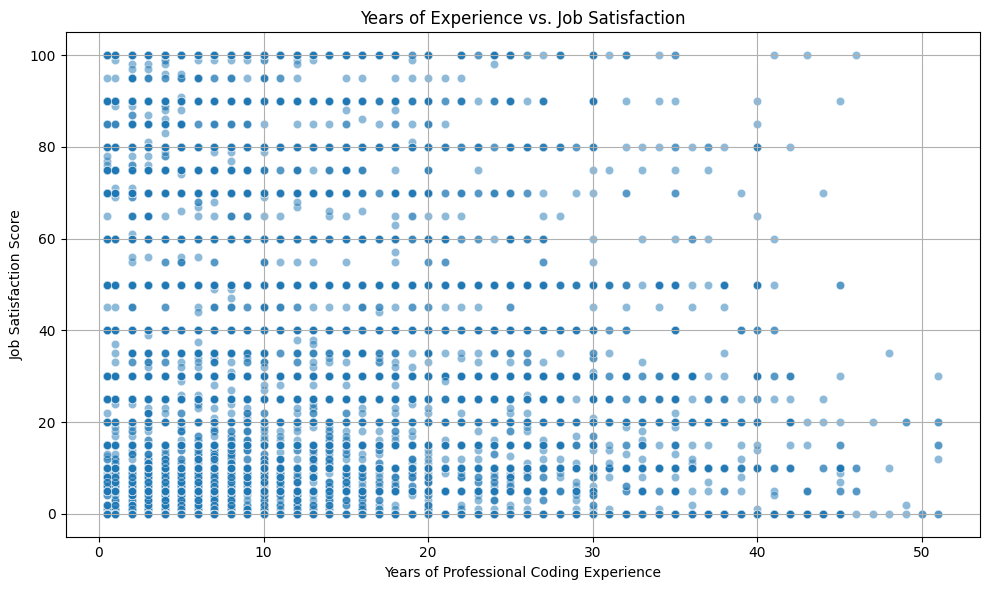

In [100]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_exp_sat, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)

plt.title('Years of Experience vs. Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [104]:
## Write your code here
edu_emp_ct = pd.crosstab(df_cleaned['EdLevel'], df_cleaned['EmploymentSimple'], normalize='index') * 100

# Display the first few rows
print(edu_emp_ct.head())

EmploymentSimple                                 Freelancer  Full-time  \
EdLevel                                                                  
Associate degree (A.A., A.S., etc.)                9.146682  78.918015   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)       7.116510  83.417529   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)    9.275567  82.773028   
Primary/elementary school                          6.195462  67.626527   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)     8.787879  79.629630   

EmploymentSimple                                    Other  Part-time  \
EdLevel                                                                
Associate degree (A.A., A.S., etc.)              0.501952   5.688790   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)     0.384893   3.836902   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  0.340683   3.876069   
Primary/elementary school                        4.450262   9.598604   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)   

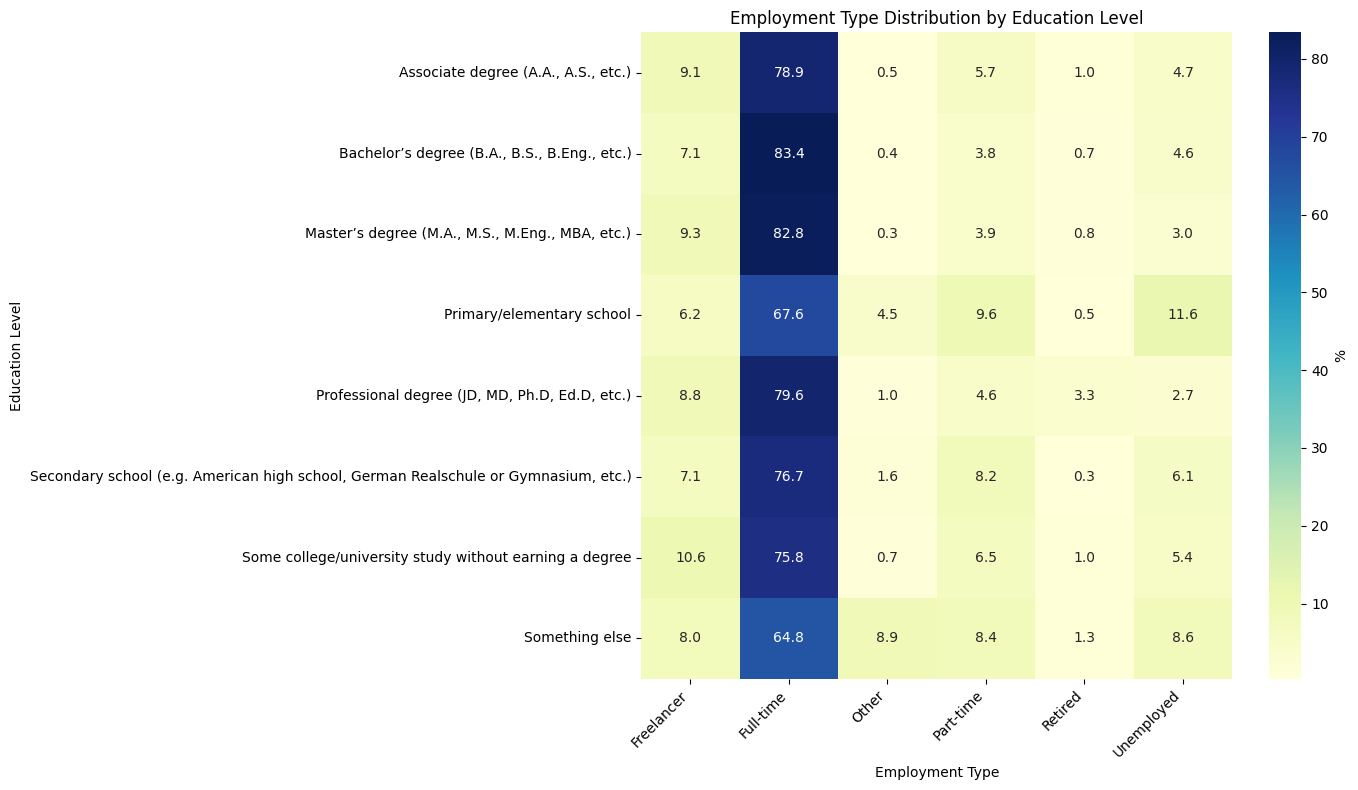

In [105]:
plt.figure(figsize=(14, 8))
sns.heatmap(edu_emp_ct, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': '%'})
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df.to_csv("cleaned_Survo_data.csv", index=False)
print("Dataset saved as cleaned_stackoverflow_data.csv")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
